<a href="https://colab.research.google.com/github/Bosy-Ayman/Machine_Learning/blob/main/SVM_Soft_Margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align = "center"></h1>
<h1 align = "center">Zewail City of Science and Technology</h1>
<h2 align = "center">CSAI 235, Machine Learning Spring 2024</h2>
<h2 align = "center">lab 6 SVM Soft Margin</h2>

# Outline:

*   SVM Intuition
- Hard margin Vs Soft margin
*   SVM with Linear Dataset
- SVM with nonlinear dataset

# SVM Intuition

### Case 1: Correct Classification
  what is the best classifier?

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_21.png>

**The best hyper-plane is the one that separates the two classes better. Therefore, B is the best hyperplane**

### Case 2: Maximizing the Margin
**These three hyper-planes separate the two classes, but which of them is the best one?**

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_3.png>

**We care about maximizing the distances between the nearest data point of either class and hyper-plane. This distance between the hyper-plane and the nearest data point of each class is called margin**

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_4.png>

### Case 3: Correct Classification vs Maximizing the Margin

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_5.png>

**By default, SVM gives more weight to correct classification than margin maximization.**
**Thus, A is the best classifier in this case.**

### Case 4: Outliers

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_71.png>

**SVM gives more weight to correct classification than margin maximization, right?**
**However, this also means that margin maximization is important!**

**Thus, SVM can detect outliers and ignore them**

# Hard margin Vs Soft margin

<img src=https://miro.medium.com/max/1172/1*PiGj6vEyBhxbXfK4bzwwTg.png>

**Hard Margin Requires ALL data points to be classified correctly. But, what if the training set is noisy?**

**Slack variables ε can be added to allow misclassification of difficult or noisy examples.**


<img src=https://i.ibb.co/Qbb8D7g/4.jpg>


**Now, we want to minimze:**
$$ \frac{1}{2}w^Tw + C \sum{\varepsilon_k}$$

**So, the new formulation for the optimization problem:**

> Find w and b such that:

> $$\phi(w) = \frac{1}{2}w^Tw + C \sum{\varepsilon_k}$$ is minimized


> For all $${(x_i ,y_i)}: y_i (w^Tx_i + b) ≥ 1 - \varepsilon_i$$

$$ \varepsilon_i ≥ 0 $$

**C hyperparameter**
- Parameter C can be viewed as a way to control overfitting
- C bounds the sum of the εi ’s, and so it determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate.


- Increasing C, increases bias, reduces the variance (we become more tolerant of violations to the margin, margin will widen)


- Decreasing C, reduces bias, increases variance (we become less tolerant of violations to the margin, margin narrows)


- C is generally chosen via cross-validation.

# Loading needed libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# SVM with linear dataset

### Loading the data

In [ ]:
iris = datasets.load_iris()
x = iris.data[:, [0, 2]]
y = iris.target

x, y = shuffle_arrays_unison(arrays=[x, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

### training the classifier

In [ ]:
svm = SVC(C=0.5, kernel='linear')
svm.fit(x_train, y_train)

SVC(C=0.5, kernel='linear')

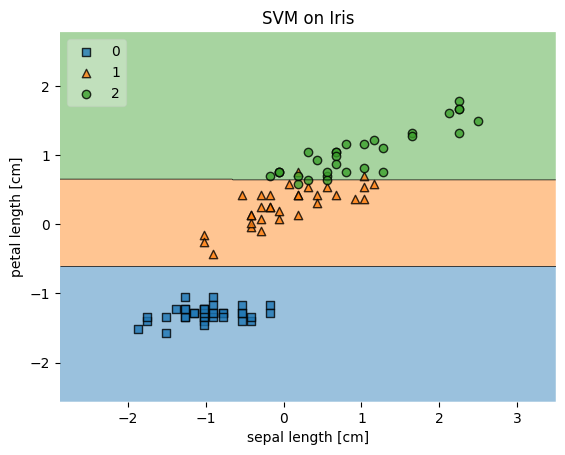

In [ ]:
# Plotting decision regions
plot_decision_regions(x_train, y_train, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

### Evaluate the model

In [ ]:
predictions = svm.predict(x_test)

print('The Accuracy of the SVM classifier is ', accuracy_score(predictions, y_test))


The Accuracy of the SVM classifier is  0.9


# SVM with nonlinear dataset

In [ ]:
#Loading Data
data = pd.read_csv('pulsar_data.csv')

In [ ]:
#Explore the dataset
data.shape

(12528, 9)

In [ ]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [ ]:
data.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [ ]:
data = data.dropna()
data.shape

(9273, 9)

In [ ]:
data.duplicated().sum()

0

<Axes: >

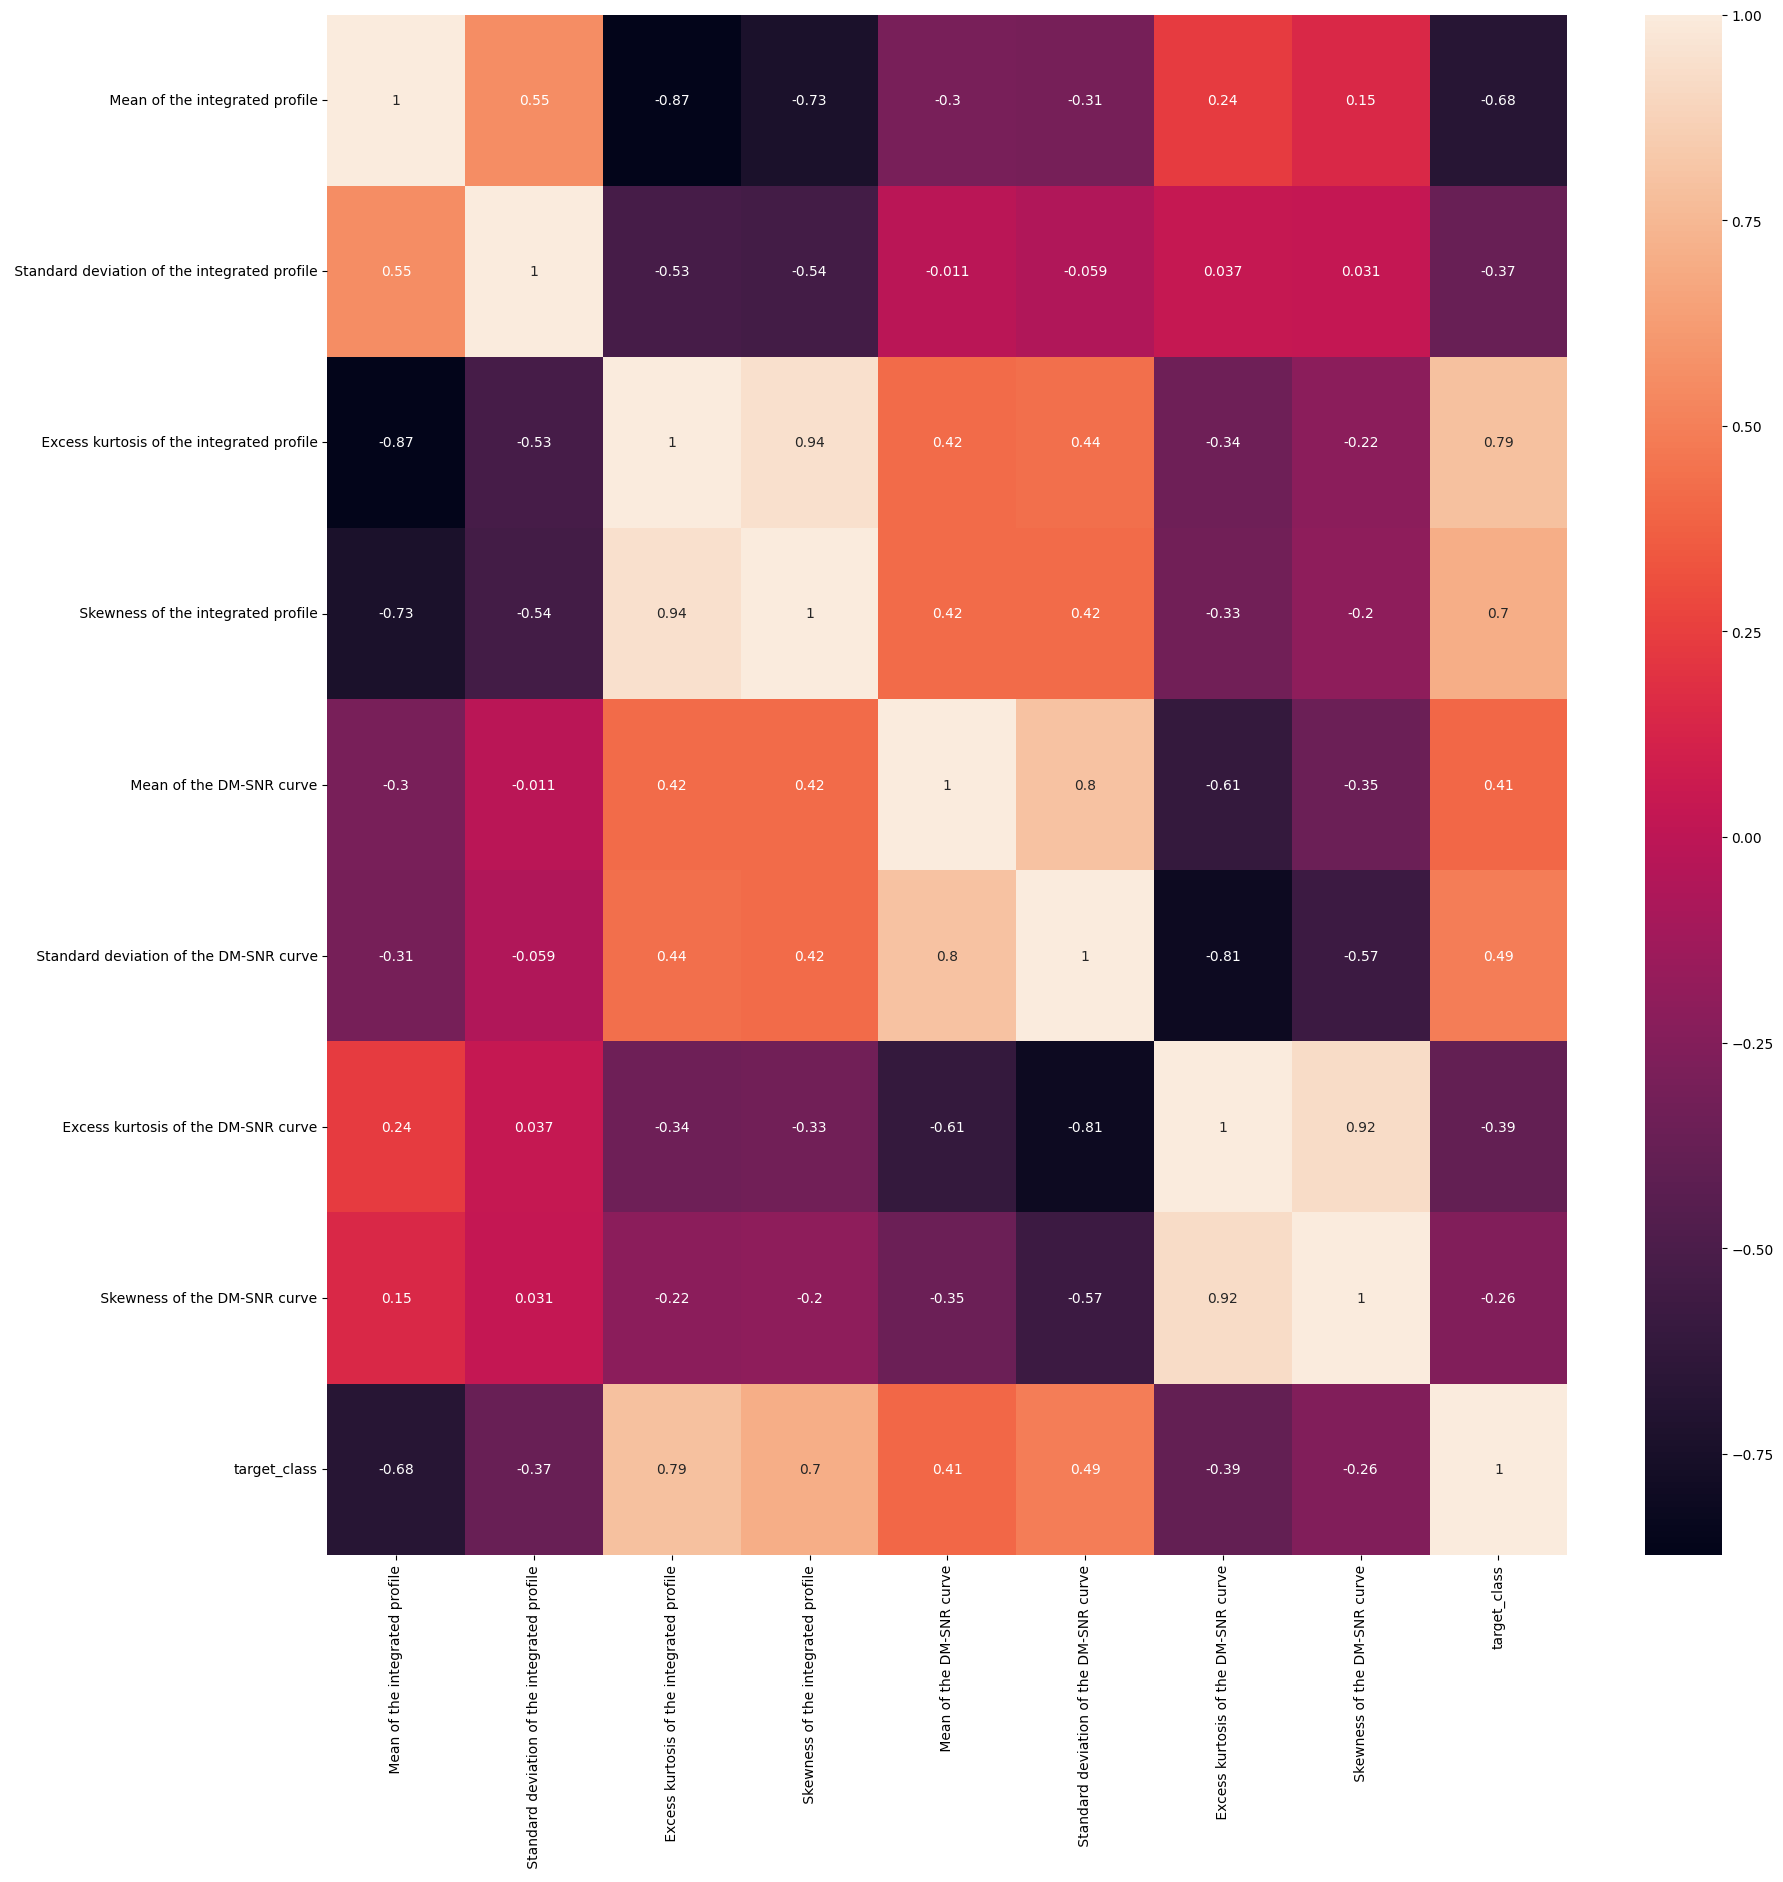

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

### we can deduce that the most two features correlated with the target values are the 'Skewness of the integrated profile' and 'Excess kurtosis of the integrated profile'.

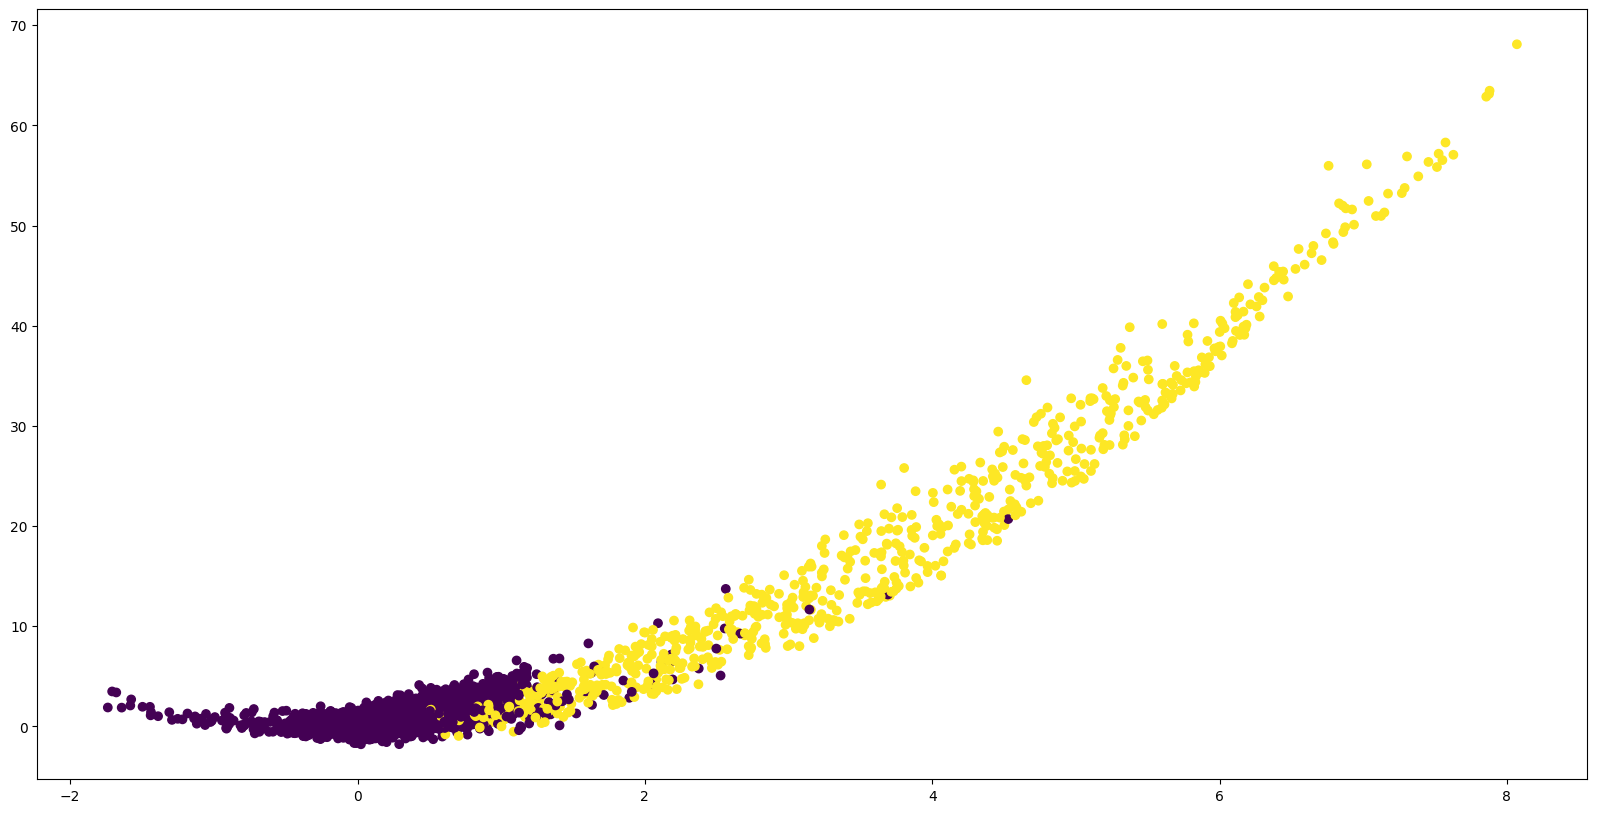

In [ ]:
plt.scatter(data[' Excess kurtosis of the integrated profile'], data[' Skewness of the integrated profile'], c = data['target_class'])

In [ ]:
x, y = data[[' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile']], data['target_class']

In [ ]:
x, y = shuffle_arrays_unison(arrays=[np.asarray(x), np.asarray(y).astype(int)], random_seed=42)

scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)
x_train, y_train = x[:7300], y[:7300]
x_test, y_test = x[7300:], y[7300:]

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

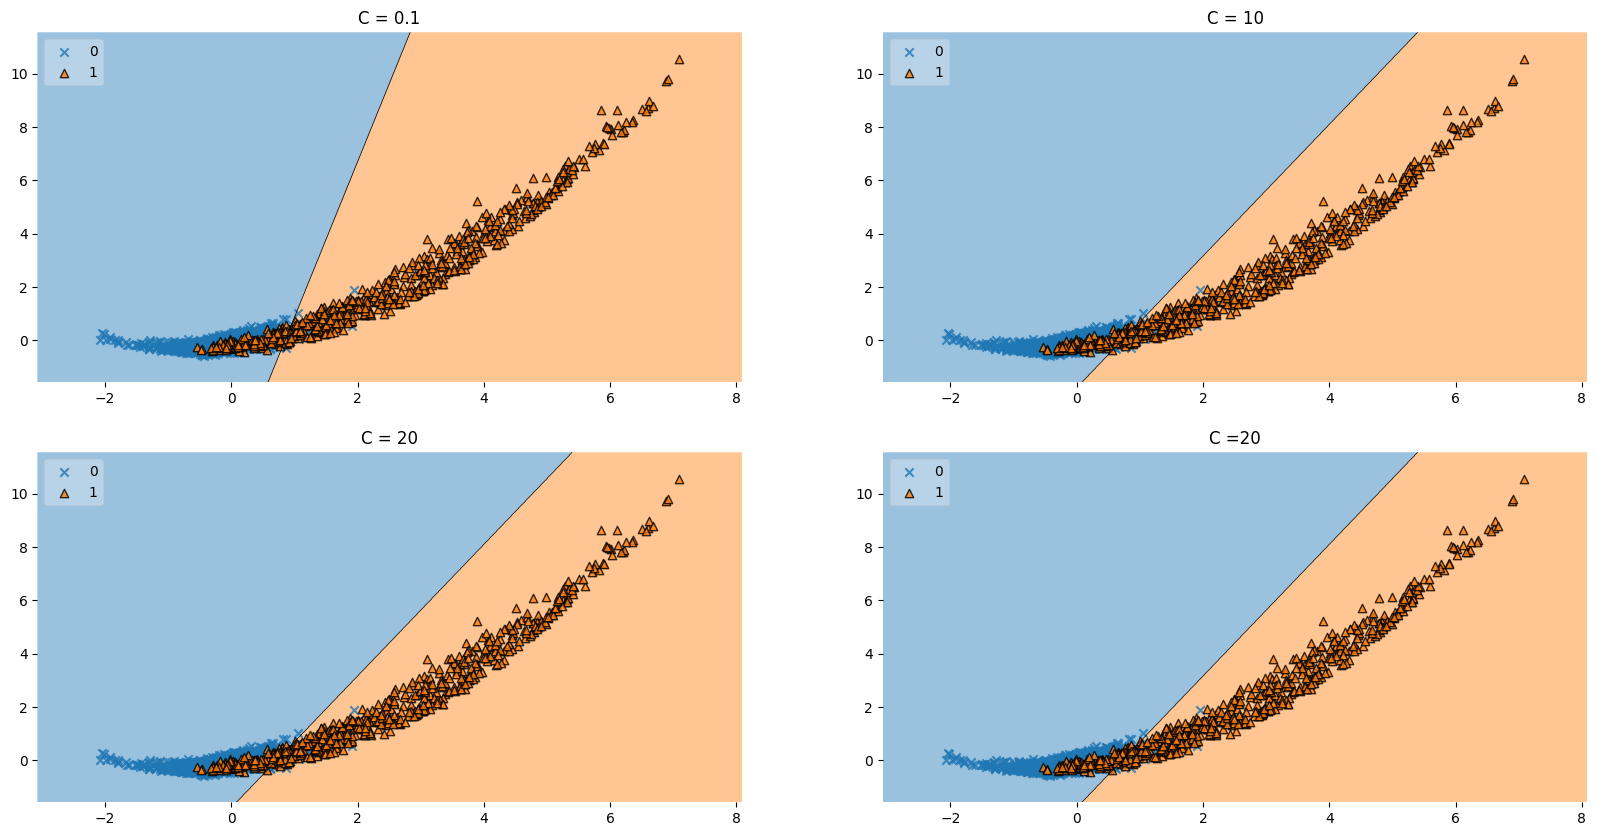

In [ ]:
gs = gridspec.GridSpec(2, 2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='linear')
clf4 = SVC(C=20, kernel='linear')


scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1' , 'C = 10', 'C = 20'  ,'C =20']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(x_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(x_train, y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

In [ ]:

for clf in [clf1, clf2, clf3, clf4]:
  predictions = clf.predict(x_test)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions, y_test))

The Accuracy of the SVC(C=0.1, kernel='linear') classifier is 0.9792194627470857
The Accuracy of the SVC(C=10, kernel='linear') classifier is 0.979726305119108
The Accuracy of the SVC(C=20, kernel='linear') classifier is 0.979726305119108
The Accuracy of the SVC(C=20, kernel='linear') classifier is 0.979726305119108


# Now, it's your turn ⚡
- Use the provided data set to apply the ML algorithms studied in the course so far.
- At first do all the cleaning and preprocessing steps you think needed.
- Use all the data featuers in your classification process.